<a href="https://colab.research.google.com/github/jacquelsn/IA-/blob/https%2Fcolab.research.google.com%2Fdrive%2F1cMPkWtq0mPav13-Sn3uc-BxjSmrcSYLY/PLN_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download', header=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [3]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: title={'center': 'Quantidade por Tipo'}>

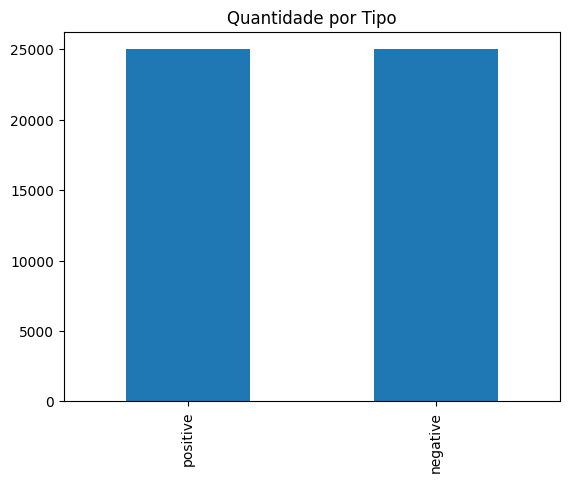

In [4]:
df["sentiment"].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)

In [5]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
exemplo = df['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [7]:
from nltk.tokenize import word_tokenize
import string
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    return palavras
exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))

['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', 'They', 'right', 'exactly', 'happened', 'me.', 'br', 'br', 'The', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'word.', 'br', 'br', 'It', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'many', '..', 'Aryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.', 'br', 'br', 'I', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 

In [8]:
from nltk.tokenize import word_tokenize
import string
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
TAMANHO_MIMINO = 1
IGNORAR = ['...', 'br','.so','\'ll']
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MIMINO]
    palavras = [i.lower() for i in palavras if i not in IGNORAR]
    palavras = [stemmer.stem(i) for i in palavras]
    return palavras
exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '....', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'c

In [9]:
%%time
df['review2'] = df['review'].apply(prepara)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 3min 29s, sys: 943 ms, total: 3min 30s
Wall time: 3min 52s


In [10]:
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


In [11]:
df.to_pickle('nano')

In [12]:
import pandas as pd
df = pd.read_pickle('nano')
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


In [14]:
%%time
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tk_X_train = tokenizer.texts_to_sequences(X_train)
tk_X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
print(X_train[0])
print(tk_X_train[0])

one review mention watch oz episod hook they right exact happen me. the first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid this show pull punch regard drug sex violenc it hardcor classic use word. it call oz nicknam given oswald maximum secur state penitentari it focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani .. aryan muslim gangsta latino christian italian irish .... scuffl death stare dodgi deal shadi agreement never far away. would say main appeal show due fact goe show would n't dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz n't mess around the first episod ever saw struck nasti surreal could n't say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may 

In [15]:
for word in ['film','the','one']:
     print('{}: {}'.format(word, tokenizer.word_index[word]))

film: 3
the: 4
one: 7


In [16]:
print('Max size:',max([len(i) for i in tk_X_train]))

Max size: 1374


In [17]:
from keras.preprocessing.sequence import pad_sequences
max_len = max([len(i) for i in tk_X_train])
tk_pad_X_train = pad_sequences(tk_X_train, padding='post', maxlen=max_len)
tk_pad_X_test = pad_sequences(tk_X_test, padding='post', maxlen=max_len)
print(tk_pad_X_train[0, :])

[ 136    1 1230 ...    0    0    0]


In [18]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:',ohe_y_train.shape)
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.optimizers import Adam

In [20]:
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()

In [21]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1374, 50)          3682600   
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3683433 (14.05 MB)
Trainable params: 3683433 (14.05 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [22]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/10
313/313 [==============================] - 54s 152ms/step - loss: 0.5624 - accuracy: 0.7419 - val_loss: 0.3808 - val_accuracy: 0.8483
Epoch 2/10
313/313 [==============================] - 32s 101ms/step - loss: 0.3605 - accuracy: 0.8568 - val_loss: 0.3148 - val_accuracy: 0.8681
Epoch 3/10
313/313 [==============================] - 19s 62ms/step - loss: 0.2963 - accuracy: 0.8894 - val_loss: 0.2979 - val_accuracy: 0.8760
Epoch 4/10
313/313 [==============================] - 12s 38ms/step - loss: 0.2465 - accuracy: 0.9136 - val_loss: 0.2939 - val_accuracy: 0.8799
Epoch 5/10
313/313 [==============================] - 12s 39ms/step - loss: 0.2048 - accuracy: 0.9335 - val_loss: 0.3009 - val_accuracy: 0.8796
Epoch 6/10
313/313 [==============================] - 9s 28ms/step - loss: 0.1688 - accuracy: 0.9473 - val_loss: 0.3143 - val_accuracy: 0.8788
Epoch 7/10
313/313 [==============================] - 7s 23ms/step - loss: 0.1414 - accuracy: 0.9593 - val_loss: 0.3310 - val_accuracy:

In [23]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print("Acurácia do Teste:  {:.4f}".format(accuracy))

Acurácia do Teste:  0.8727


In [24]:
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


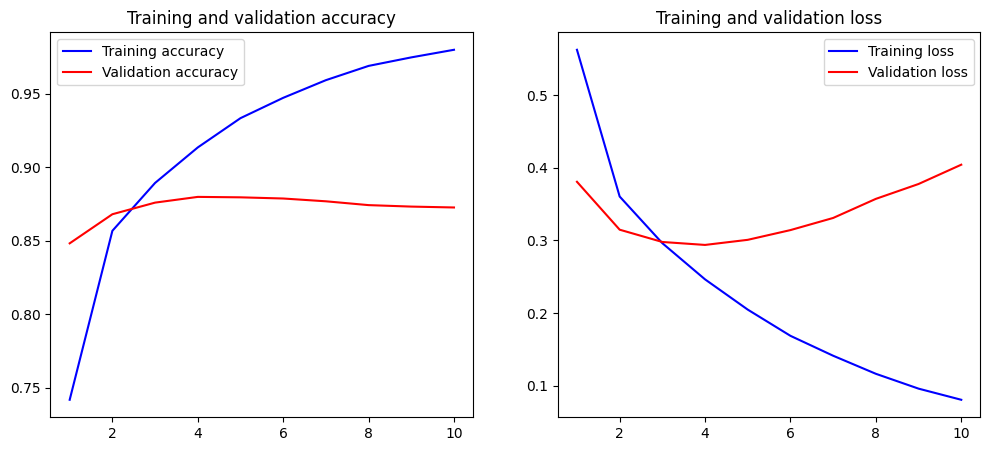

In [25]:
plot_history(history)

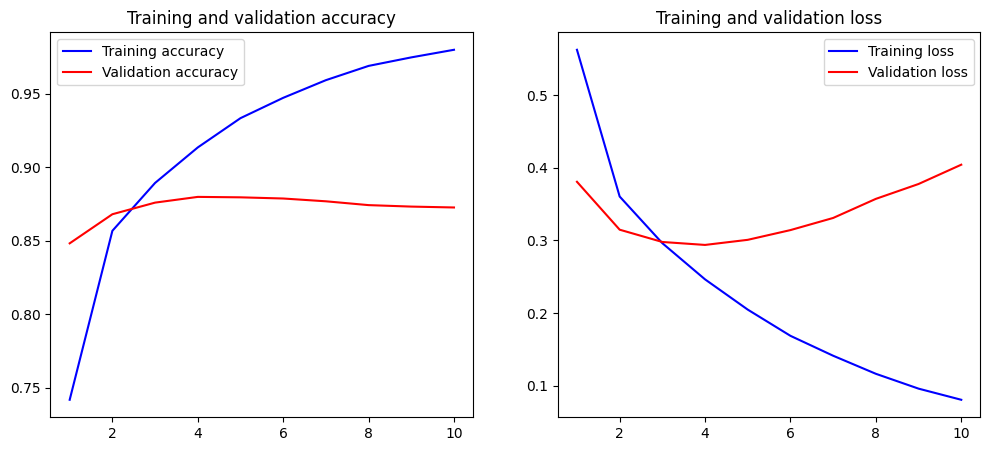

In [26]:
plot_history(history)

In [27]:
%cd drive/MyDrive/'Colab Notebooks'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content


In [28]:
%ls -la

total 102684
drwxr-xr-x 1 root root      4096 Oct 24 20:25 ./
drwxr-xr-x 1 root root      4096 Oct 24 20:20 ../
drwxr-xr-x 4 root root      4096 Oct 23 13:26 .config/
-rw-r--r-- 1 root root 105124533 Oct 24 20:25 nano
drwxr-xr-x 1 root root      4096 Oct 23 13:26 sample_data/


In [29]:
%%bash
head -n 1 glove.6B.50d.txt | cut -c-100

head: cannot open 'glove.6B.50d.txt' for reading: No such file or directory


In [30]:
import numpy as np
def create_embedding(path, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding = np.zeros((vocab_size, embedding_dim))
    with open(path) as f:
        for line in f:
            w, *vector = line.split()
            if w in word_index:
                idx = word_index[w]
                embedding[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding

In [31]:
%%time
embedding_dim = 50
embedding_matrix = create_embedding('glove.6B.50d.txt', tokenizer.word_index, embedding_dim)
print(embedding_matrix.shape)

FileNotFoundError: ignored

In [32]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len, weights=[embedding_matrix]))
model.add(GlobalMaxPool1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

NameError: ignored

In [ ]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

In [ ]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print("Acurácia do Teste:  {:.4f}".format(accuracy))

In [ ]:
plot_history(history)

In [ ]:
NB_EPOCH = 3
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
print(vocab_size)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

In [ ]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print("Acurácia do Teste:  {:.4f}".format(accuracy))

In [ ]:
plot_history(history)

FIM